**HW2 DATA PREPROCESSING AND VISUALIZATION**

*   CS 460
*   3/4/2024
*   Noah Caulfield
*   Eastern New Mexico University


---




***Problem 1***

In [54]:
# Given dictionary for DataFrame creation
data = {
 'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
 'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
 'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
 'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
 'weight': [500, 450, 300, np.nan, 410, np.nan],
 'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)

# Initialize and apply SimpleImputer to fill missing values with 99.0
imputer = SimpleImputer(strategy='constant', fill_value=99.0)
df['price'] = imputer.fit_transform(df[['price']])
df['weight'] = imputer.fit_transform(df[['weight']])

# Adjusting the DataFrame to add a custom index column that starts with 1 for the title row
# Adding 1 to the range for the title row
custom_index = np.arange(2, len(df) + 2)
df.insert(0, ' ', custom_index)

# Since the DataFrame structure doesn't allow to place a number for the title row,
# we manually add the title row number by printing it before the DataFrame.
title_row_number = "1."
title = ["size", "color", "gender", "price", "weight", "bought"]
title_row = dict(zip(title, title))

# Printing the title row with the custom number
print(title_row_number, " ".join(title))

# Printing the DataFrame without the index and header
print(df.to_string(index=False, header=False))


1. size color gender price weight bought
2  XL   red female 199.0 500.0 yes
3   L green   male  89.0 450.0  no
4   M  blue    NaN  99.0 300.0 yes
5 NaN green female 129.0  99.0  no
6   M   red female  79.0 410.0 yes
7   M green   male  89.0  99.0  no


**Problem 2**

In [28]:
#Place dataframe in grid formatting
df = pd.DataFrame({
    'size': ['0 XL', '1 L', '2 M', '3 M', '4 M', '5 M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', 'male', 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500.0, 450.0, 300.0, np.nan, 410.0, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
})

# Replace NaN with 'NaN' string
df = df.fillna('NaN')

# function for printing dataFrame
def print_df_in_grid(df):
    header = ["size", "color", "gender", "price", "weight", "bought"]
    # Find the maximum width of the string representation for each column
    col_widths = {col: max(df[col].astype(str).apply(len).max(), len(col)) for col in header}

    # make header row
    header_row = "1. " + " ".join(col.ljust(col_widths[col]) for col in header)

    # make data rows
    data_rows = [
        f"{i+2}. " + " ".join(str(df.at[i, col]).ljust(col_widths[col]) for col in header)
        for i in df.index
    ]

    # combine headers and rows for grid
    grid = [header_row] + data_rows
    return "\n".join(grid)

#print df in grid
df_grid = print_df_in_grid(df)
print(df_grid)



1. size color gender price weight bought
2. 0 XL red   female 199.0 500.0  yes   
3. 1 L  green male   89.0  450.0  no    
4. 2 M  blue  male   NaN   300.0  yes   
5. 3 M  green female 129.0 NaN    no    
6. 4 M  red   female 79.0  410.0  yes   
7. 5 M  green male   89.0  NaN    no    


**Problem 3**

In [19]:

# Dataframe
df = pd.DataFrame({
    'weight': [75.0, 78.5, 85.0, 91.0, 84.5, 83.0, 68.0],
    'weight_cut': ['light', 'normal', 'heavy', 'heavy', 'heavy', 'heavy', 'light']
})

#put weight_cut in explicit order
df['weight_cut'] = pd.Categorical(df['weight_cut'], categories=['light', 'normal', 'heavy'], ordered=True)

# make weight_cut a prefix to attach via titles
df_with_dummies = pd.get_dummies(df, columns=['weight_cut'])
#print
df_with_dummies


,weight,weight_cut_light,weight_cut_normal,weight_cut_heavy
0,75.0,1,0,0
1,78.5,0,1,0
2,85.0,0,0,1
3,91.0,0,0,1
4,84.5,0,0,1
5,83.0,0,0,1
6,68.0,1,0,0


**Problem 4**

In [ ]:


# Create  dataFrame
df = pd.DataFrame({
    'currency': [['PLN', 'USD'], ['EUR', 'USD', 'PLN', 'CAD'], ['GBP'], ['JPY', 'CZK', 'HUF'], []]
})

# Assign a new column 'number' that takes the number of items in the currency column
df['number'] = df['currency'].apply(len)

print(df)


               currency  number
0            [PLN, USD]       2
1  [EUR, USD, PLN, CAD]       4
2                 [GBP]       1
3       [JPY, CZK, HUF]       3
4                    []       0


**Problem 5**

In [29]:

# Create DataFrame
df = pd.DataFrame({
    'currency': [['PLN', 'USD'], ['EUR', 'USD', 'PLN', 'CAD'], ['GBP'], ['JPY', 'CZK', 'HUF'], []]
})

# Assign a new column 'PLN_flag'to store either 1 or 0
df['PLN_flag'] = df['currency'].apply(lambda x: 1 if 'PLN' in x else 0)

print(df)

               currency  PLN_flag
0            [PLN, USD]         1
1  [EUR, USD, PLN, CAD]         1
2                 [GBP]         0
3       [JPY, CZK, HUF]         0
4                    []         0


**Problem 6**

In [34]:

from sklearn.preprocessing import StandardScaler

# Load the data
data_path = '/content/drive/MyDrive/data.csv'
df = pd.read_csv(data_path)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform data
scaled_data = scaler.fit_transform(df)

# round to 4th decimal place
rounded_scaled_data = np.round(scaled_data, 4)

print(rounded_scaled_data[:12])


[[-0.4785 -0.2137 -0.4584 -0.5114  0.0636]
 [ 1.3742  0.3895  1.2924  1.4055 -0.616 ]
 [ 0.3777 -0.0178  0.3905  0.2783  0.7424]
 [-0.4986 -0.4185 -0.4427 -0.5531  0.4723]
 [-0.7449 -1.1397 -0.7236 -0.745   0.0771]
 [ 1.8496  2.1747  1.9719  1.8048  1.3537]
 [ 2.2534  0.5208  2.2644  2.4466  0.5363]
 [ 0.9819 -1.0039  0.9382  0.8882 -0.0203]
 [-0.2294 -0.8236 -0.236  -0.3987  0.6429]
 [-0.069  -0.6544 -0.1338 -0.1639 -2.1663]
 [-0.2666  1.2665 -0.3344 -0.3457 -0.7709]
 [ 0.7557 -0.1692  0.7035  0.6847 -0.7183]]


**Problem 7**

In [36]:


# Load X_train.csv and X_test.csv to dataframe
X_train_path = '/content/drive/MyDrive/X_train.csv'
X_test_path = '/content/drive/MyDrive/X_test.csv'

X_train = pd.read_csv(X_train_path)
X_test = pd.read_csv(X_test_path)

# Initialize and fit the scaler on X_train
scaler = StandardScaler().fit(X_train)

# Standardize both csv files
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Round scaled data
X_train_scaled_rounded = X_train_scaled.round(4)
X_test_scaled_rounded = X_test_scaled.round(4)

# show first 5 rows from each set
print( X_train_scaled_rounded[:5])
print( X_test_scaled_rounded[:5])

[[-0.3491 -1.4385 -0.4117 -0.3905 -1.8637]
 [-0.2047  0.3126 -0.1337 -0.2759  1.0781]
 [-0.3293 -0.2151 -0.3174 -0.3644 -1.5799]
 [ 1.0274  2.0898  1.0469  0.9176  0.3163]
 [ 1.829   0.696   1.7637  1.7838 -0.3337]]
[[-0.4681 -0.1417 -0.4447 -0.486   0.2934]
 [ 1.3645  0.4996  1.3064  1.3344 -0.3917]
 [ 0.3788  0.0665  0.4043  0.264   0.9777]
 [-0.4879 -0.3594 -0.429  -0.5256  0.7054]
 [-0.7315 -1.1261 -0.71   -0.7079  0.307 ]]


**Problem 8**

Part 1

In [45]:

def read_speeches_from_directory(directory_path):
    # make lists to hold contents and file_names
    contents = []
    file_names = []

    # verify directory
    if not os.path.exists(directory_path):
        print(f"Directory {directory_path} not found.")
        return None

    # Loop through all files
    for file_name in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file_name)

        # Make sure path exists
        if os.path.isfile(file_path):
            # read in files
            with open(file_path, 'r', encoding='utf-8') as file:
                contents.append(file.read())
                file_names.append(file_name)

    # create df with FileNames and Content
    df = pd.DataFrame({
        'FileName': file_names,
        'Content': contents
    }).sort_values('FileName').reset_index(drop=True)  # sort by name like in .pdf

    return df

# folder path location
directory_path = '/content/drive/MyDrive/Speeches'

# read speaches into df
speech_df = read_speeches_from_directory(directory_path)
speech_df


,FileName,Content
0,BattleCreekDec19_2019.txt,Thank you. Thank you. Thank you to Vice Presid...
1,BemidjiSep18_2020.txt,There's a lot of people. That's great. Thank y...
2,CharlestonFeb28_2020.txt,Thank you. Thank you. Thank you. All I can say...
3,CharlotteMar2_2020.txt,"I want to thank you very much. North Carolina,..."
4,CincinnatiAug1_2019.txt,Thank you all. Thank you very much. Thank you ...
5,ColoradorSpringsFeb20_2020.txt,"Hello Colorado. We love Colorado, most beautif..."
6,DallasOct17_2019.txt,Thank you. Thank you very much. Hello Dallas. ...
7,DesMoinesJan30_2020.txt,I worked so hard for this state. I worked so h...
8,FayettevilleSep19_2020.txt,"What a crowd, what a crowd. Get those people o..."
9,FayettevilleSep9_2019.txt,Thank you everybody. Thank you and Vice Presi...


Part 2

In [42]:

def parse_filename(file_name):
    # remove .txt
    clean_file_name = file_name.rsplit('.', 1)[0]
    # define months
    month_abbrs = {
        'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04',
        'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08',
        'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'
    }

    # find month and year by file name structure
    for month_abbr, month_num in month_abbrs.items():
        if month_abbr in clean_file_name:
            start_pos = clean_file_name.find(month_abbr)
            # Extract the components based on positions
            city = clean_file_name[:start_pos].replace('-', ' ')
            day_year = clean_file_name[start_pos + len(month_abbr):].split('_')
            if len(day_year) == 2:
                day, year = day_year
                # remove .txt
                year = year.rstrip('.txt')
                date = f"{year}-{month_num}-{day.zfill(2)}"
                return city, date, day, month_num, year
    return None, None, None, None, None

def read_speeches_from_directory(directory_path):
    contents, cities, dates, days, months, years = [], [], [], [], [], []

    if not os.path.exists(directory_path):
        print(f"Directory {directory_path} not found.")
        return None

    for file_name in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file_name)

        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
                contents.append(content)

            # Parse filename
            city, date, day, month, year = parse_filename(file_name)

            if city:  # verify city in not "None"
                cities.append(city)
                dates.append(date)
                days.append(day)
                months.append(month)
                years.append(year)
            else:
                # Append None to keep
                cities.append(None)
                dates.append(None)
                days.append(None)
                months.append(None)
                years.append(None)

    # Create and return the DataFrame
    df = pd.DataFrame({
        'Content': contents, # first column
        'City': cities,      #second
        'Date': dates,        #third etc
        'Day': days,
        'Month': months,
        'Year': years
    }).sort_values(by='City').reset_index(drop=True)  # put cities in alphabetical order like in .pdf

    return df

directory_path = '/content/drive/MyDrive/Speeches'

# ccreate dataframe w/ speeches
speech_df = read_speeches_from_directory(directory_path)


speech_df   #Print




,Content,City,Date,Day,Month,Year
0,Thank you. Thank you. Thank you to Vice Presid...,BattleCreek,2019-12-19,19,12,2019
1,There's a lot of people. That's great. Thank y...,Bemidji,2020-09-18,18,09,2020
2,Thank you. Thank you. Thank you. All I can say...,Charleston,2020-02-28,28,02,2020
3,"I want to thank you very much. North Carolina,...",Charlotte,2020-03-02,2,03,2020
4,Thank you all. Thank you very much. Thank you ...,Cincinnati,2019-08-01,1,08,2019
5,"Hello Colorado. We love Colorado, most beautif...",ColoradorSprings,2020-02-20,20,02,2020
6,Thank you. Thank you very much. Hello Dallas. ...,Dallas,2019-10-17,17,10,2019
7,I worked so hard for this state. I worked so h...,DesMoines,2020-01-30,30,01,2020
8,"What a crowd, what a crowd. Get those people o...",Fayetteville,2020-09-19,19,09,2020
9,Thank you everybody. Thank you and Vice Presi...,Fayetteville,2019-09-09,9,09,2019


Part 3

In [44]:

def parse_filename(file_name):
    clean_file_name = file_name.rsplit('.', 1)[0]
    month_abbrs = {
        'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04',
        'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08',
        'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'
    }

    for month_abbr, month_num in month_abbrs.items():
        if month_abbr in clean_file_name:
            start_pos = clean_file_name.find(month_abbr)
            city = clean_file_name[:start_pos].replace('-', ' ')
            day_year = clean_file_name[start_pos + len(month_abbr):].split('_')
            if len(day_year) == 2:
                day, year = day_year
                year = year.rstrip('.txt')
                date = f"{year}-{month_num}-{day.zfill(2)}"
                return city, date, day, month_num, year
    return None, None, None, None, None

def read_speeches_from_directory(directory_path):
    contents, cities, dates, days, months, years = [], [], [], [], [], []

    if not os.path.exists(directory_path):
        print(f"Directory {directory_path} not found.")
        return None

    for file_name in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file_name)

        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
                contents.append(content)

            city, date, day, month, year = parse_filename(file_name)
            cities.append(city)
            dates.append(date)
            days.append(day)
            months.append(month)
            years.append(year)

    df = pd.DataFrame({
        'Content': contents,
        'City': cities,
        'Date': dates,
        'Day': days,
        'Month': months,
        'Year': years
    }).sort_values(by='City').reset_index(drop=True)

    return df

def calculate_word_ratios(content, search_words):
    words = content.lower().split()
    total_words = len(words)
    ratios = {}
    for word in search_words:
        count = words.count(word)
        ratio = count / total_words if total_words > 0 else 0
        ratios[word] = ratio
    return ratios

# Set the directory path for Google Colab
directory_path = '/content/drive/MyDrive/Speeches'

# Read the speeches and create a DataFrame
speech_df = read_speeches_from_directory(directory_path)

# Define the list of words to search for
search_words = ['vote', 'tax', 'campaign', 'economy']

# Calculate word appearance ratios for each document
for word in search_words:
    speech_df['r_'+ word ] = speech_df['Content'].apply(lambda x: calculate_word_ratios(x, search_words)[word])

# To display the entire DataFrame, simply put the DataFrame variable at the end of a cell
speech_df



,Content,City,Date,Day,Month,Year,r_vote,r_tax,r_campaign,r_economy
0,Thank you. Thank you. Thank you to Vice Presid...,BattleCreek,2019-12-19,19,12,2019,0.000280,0.000112,0.000056,0.000280
1,There's a lot of people. That's great. Thank y...,Bemidji,2020-09-18,18,09,2020,0.000355,0.000059,0.000237,0.000000
2,Thank you. Thank you. Thank you. All I can say...,Charleston,2020-02-28,28,02,2020,0.000528,0.000106,0.000106,0.000000
3,"I want to thank you very much. North Carolina,...",Charlotte,2020-03-02,2,03,2020,0.000300,0.000600,0.000150,0.000450
4,Thank you all. Thank you very much. Thank you ...,Cincinnati,2019-08-01,1,08,2019,0.000734,0.000367,0.000857,0.000245
5,"Hello Colorado. We love Colorado, most beautif...",ColoradorSprings,2020-02-20,20,02,2020,0.000429,0.000086,0.000172,0.000086
6,Thank you. Thank you very much. Hello Dallas. ...,Dallas,2019-10-17,17,10,2019,0.000286,0.000381,0.000476,0.000190
7,I worked so hard for this state. I worked so h...,DesMoines,2020-01-30,30,01,2020,0.000513,0.000598,0.000171,0.000171
8,"What a crowd, what a crowd. Get those people o...",Fayetteville,2020-09-19,19,09,2020,0.000371,0.000062,0.000247,0.000124
9,Thank you everybody. Thank you and Vice Presi...,Fayetteville,2019-09-09,9,09,2019,0.001196,0.000217,0.000217,0.000435


Part 4

In [50]:
def parse_filename(file_name):
    clean_file_name = file_name.rsplit('.', 1)[0]
    month_abbrs = {
        'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04',
        'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08',
        'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'
    }
    month_names = {
        '01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr',
        '05': 'May', '06': 'Jun', '07': 'Jul', '08': 'Aug',
        '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'
    }

    for month_abbr, month_num in month_abbrs.items():
        if month_abbr in clean_file_name:
            start_pos = clean_file_name.find(month_abbr)
            day_year = clean_file_name[start_pos + len(month_abbr):].split('_')
            if len(day_year) == 2:
                day, year = day_year
                year = year.rstrip('.txt')
                y_m = f"{year}_{month_names[month_num]}"
                return y_m
    return None

def read_speeches_from_directory(directory_path):
    contents, y_m = [], []

    if not os.path.exists(directory_path):
        print(f"Directory {directory_path} not found.")
        return None

    for file_name in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file_name)

        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
                contents.append(content)

            y_m_value = parse_filename(file_name)
            y_m.append(y_m_value)

    return contents, y_m

def calculate_word_ratios(contents, search_words):
    ratios = {word: [] for word in search_words}
    for content in contents:
        words = content.lower().split()
        total_words = len(words)
        for word in search_words:
            count = words.count(word)
            ratio = count / total_words if total_words > 0 else 0
            ratios[word].append(ratio)
    return ratios

directory_path = '/content/drive/MyDrive/Speeches'
search_words = ['vote', 'tax', 'campaign', 'economy']

contents, y_m = read_speeches_from_directory(directory_path)
ratios = calculate_word_ratios(contents, search_words)

# Create DataFrame with Y_M
speech_df = pd.DataFrame({'Y_M': y_m})

# Append ratios
for word in search_words:
    speech_df['r_' + word] = ratios[word]

speech_df



,Y_M,r_vote,r_tax,r_campaign,r_economy
0,2019_Nov,0.000539,0.000216,0.000108,0.000108
1,2019_Sep,0.001196,0.000217,0.000217,0.000435
2,2020_Sep,0.000550,0.000206,0.000000,0.000138
3,2020_Feb,0.000528,0.000106,0.000106,0.000000
4,2020_Sep,0.000718,0.000539,0.000090,0.000539
5,2020_Sep,0.000427,0.000213,0.000142,0.000142
6,2019_Sep,0.000522,0.000348,0.000435,0.000087
7,2019_Oct,0.000172,0.000000,0.000773,0.000258
8,2019_Sep,0.000000,0.002010,0.000402,0.000804
9,2020_Jun,0.000445,0.000178,0.000178,0.000089


Part 5

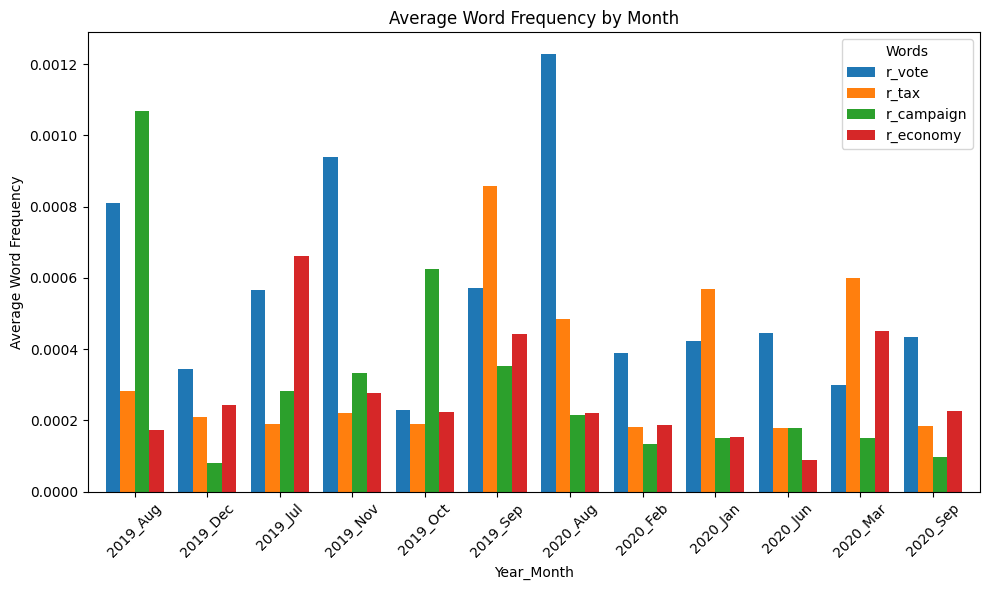

In [53]:

# parse filenames into a Year_Month format
def parse_filename(file_name):
    clean_file_name = file_name.rsplit('.', 1)[0]
    month_abbrs = {
        'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04',
        'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08',
        'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'
    }
    month_names = {
        '01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr',
        '05': 'May', '06': 'Jun', '07': 'Jul', '08': 'Aug',
        '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'
    }

    for month_abbr, month_num in month_abbrs.items():
        if month_abbr in clean_file_name:
            start_pos = clean_file_name.find(month_abbr)
            day_year = clean_file_name[start_pos + len(month_abbr):].split('_')
            if len(day_year) == 2:
                day, year = day_year
                year = year.rstrip('.txt')
                y_m = f"{year}_{month_names[month_num]}"
                return y_m
    return None

#read speeches from the given directory
def read_speeches_from_directory(directory_path):
    if not os.path.exists(directory_path):
        print(f"Directory {directory_path} not found.")
        return None, None

    contents, y_m = [], []
    for file_name in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file_name)
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
            contents.append(content)
            y_m_value = parse_filename(file_name)
            y_m.append(y_m_value)
    return contents, y_m

#calculate word ratios in the contents
def calculate_word_ratios(contents, search_words):
    ratios = {word: [] for word in search_words}
    for content in contents:
        words = content.lower().split()
        total_words = len(words)
        for word in search_words:
            count = words.count(word)
            ratio = count / total_words if total_words > 0 else 0
            ratios[word].append(ratio)
    return ratios

# Set directory path
directory_path = '/content/drive/MyDrive/Speeches'
search_words = ['vote', 'tax', 'campaign', 'economy']

# Read speeches & calculate word ratios
contents, y_m = read_speeches_from_directory(directory_path)
if contents is not None and y_m is not None:
    ratios = calculate_word_ratios(contents, search_words)

    # Create DataFrame
    speech_df = pd.DataFrame({'Y_M': y_m})
    for word in search_words:
        speech_df[f'r_{word}'] = ratios[word]

    # Convert Y_M sorting, then display
    speech_df['Y_M_Datetime'] = pd.to_datetime(speech_df['Y_M'], format='%Y_%b')
    speech_df.sort_values('Y_M_Datetime', inplace=True)
    speech_df['Y_M'] = speech_df['Y_M_Datetime'].dt.strftime('%Y_%b')
    speech_df.drop('Y_M_Datetime', axis=1, inplace=True)

    # Calculate average word for Y_M
    avg_word_frequencies = speech_df.groupby('Y_M').mean().reset_index()

    # Plot
    avg_word_frequencies.plot(x='Y_M', kind='bar', figsize=(10, 6), width=0.8)
    plt.title('Average Word Frequency by Month')
    plt.xlabel('Year_Month')
    plt.ylabel('Average Word Frequency')
    plt.xticks(rotation=45)
    plt.legend([f'r_{word}' for word in search_words], title="Words")
    plt.tight_layout()
    plt.show()
else:
    print("Failed to read speeches from directory.")

